In [12]:
import iResNet

import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim

import importlib
importlib.reload(iResNet)

<module 'iResNet' from '/home/yanbo/Research/Lab/eLIFE/iResNetLab/src/iResNet.py'>

## FCN

In [9]:
model = iResNet.FCN(2, 1)
model

FCN(
  (net): SNFCN(
    (g): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): GELU()
      (2): Linear(in_features=16, out_features=16, bias=True)
      (3): GELU()
      (4): Linear(in_features=16, out_features=2, bias=True)
    )
  )
  (noise): NormalDistribution()
)

In [10]:
x = torch.Tensor([[1,2], [3,4]])
x.requires_grad = True
model.train()

y, p, logdet = model(x)
y

tensor([[0.9987],
        [2.9998]], grad_fn=<SliceBackward>)

In [11]:
model.inverse(y.detach())

tensor([[ 1.0344, -1.7631],
        [ 3.0441,  2.0256]])

## Sequential

In [27]:
model = iResNet.Sequential(iResNet.FCN(2, 2),
                           iResNet.FCN(2, 2),
                           iResNet.FCN(2, 2))
print(model)

Sequential(
  (0): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=2, out_features=16, bias=True)
        (1): GELU()
        (2): Linear(in_features=16, out_features=16, bias=True)
        (3): GELU()
        (4): Linear(in_features=16, out_features=2, bias=True)
      )
    )
    (noise): NormalDistribution()
  )
  (1): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=2, out_features=16, bias=True)
        (1): GELU()
        (2): Linear(in_features=16, out_features=16, bias=True)
        (3): GELU()
        (4): Linear(in_features=16, out_features=2, bias=True)
      )
    )
    (noise): NormalDistribution()
  )
  (2): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=2, out_features=16, bias=True)
        (1): GELU()
        (2): Linear(in_features=16, out_features=16, bias=True)
        (3): GELU()
        (4): Linear(in_features=16, out_features=2, bias=True)
      )
    )
    (noise): NormalDi

In [18]:
x = torch.Tensor([[1,2], [3,4], [-3,1]])
x.requires_grad = True
model.train()

y, p, logdet = model(x)
y

tensor([[ 0.9652,  2.7492],
        [ 3.3913,  4.7129],
        [-2.4317,  1.4621]], grad_fn=<SliceBackward>)

In [19]:
x = torch.Tensor([[1,2], [3,4], [-2, 1]])
x.requires_grad = True
model.eval()

y = model(x)
y

tensor([[ 0.9652,  2.7492],
        [ 3.3913,  4.7129],
        [-1.6966,  1.5556]], grad_fn=<SliceBackward>)

In [20]:
model.inverse(y.detach())

tensor([[ 1.0000,  2.0000],
        [ 3.0000,  4.0000],
        [-2.0000,  1.0000]])

# Conv1d

In [2]:
#model = Conv1d(2, 3)
model = iResNet.Sequential(iResNet.Conv1d(channel=2, kernel_size=3),
                           iResNet.Conv1d(channel=2, kernel_size=1),
                           iResNet.Conv1d(channel=2, kernel_size=3))
model

Sequential(
  (0): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(3,), stride=(1,), padding=(1,))
      )
    )
  )
  (1): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(1,), stride=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(1,), stride=(1,))
      )
    )
  )
  (2): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(3,), stride=(1,), padding=(1,))
      )
    )
  )
)

In [7]:
x = torch.Tensor([[[1,2,3,4,5],[-1,-2,-3,-4,-5]], [[1,2,0,4,5],[-1,-2,0,-4,-5]]])
x.requires_grad = True

y, logp, logdet = model(x)
y

tensor([[[ 0.9487,  1.8784,  2.7273,  3.6926,  4.6764],
         [-1.1954, -2.2772, -3.3897, -4.4579, -5.3149]],

        [[ 0.9672,  1.9152, -0.1993,  3.7975,  4.6542],
         [-1.1567, -2.2055, -0.2905, -4.4541, -5.3364]]],
       grad_fn=<AddBackward0>)

In [8]:
model.inverse(y)

tensor([[[ 1.0000e+00,  2.0000e+00,  3.0000e+00,  4.0000e+00,  5.0000e+00],
         [-1.0000e+00, -2.0000e+00, -3.0000e+00, -4.0000e+00, -5.0000e+00]],

        [[ 1.0000e+00,  2.0000e+00, -1.4901e-08,  4.0000e+00,  5.0000e+00],
         [-1.0000e+00, -2.0000e+00, -7.4506e-09, -4.0000e+00, -5.0000e+00]]])

# Conv2d

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
model = iResNet.Sequential(iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3),
                           iResNet.Conv2d(channel=2, kernel_size=3)
                          )

In [81]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(10):
    optimizer.zero_grad()
    x = torch.Tensor([[[[1,1,1],[0,1,0],[0,1,0]], [[0,1,0],[1,1,1],[0,1,0]]]])
    x.requires_grad = True
    
    target = torch.Tensor([[[[0,0,0],[0,1,0],[0,0,0]], [[0,0,0],[0,1,0],[0,0,0]]]])
    y, logp, logdet = model(x)
    loss = nn.MSELoss()(y, target)
    loss.backward()
    
    optimizer.step()

In [82]:
x = torch.Tensor([[[[1,1,1],[0,1,0],[0,1,0]], [[0,1,0],[1,1,1],[0,1,0]]]])
x.requires_grad = True

y, logp, logdet = model(x)
y

tensor([[[[ 0.0127, -0.0711, -0.0288],
          [-0.0796,  1.0824, -0.0712],
          [ 0.0705,  0.0187,  0.0712]],

         [[-0.0712,  0.2428, -0.0610],
          [ 0.1734,  1.0138,  0.1475],
          [-0.0160,  0.2151, -0.0242]]]], grad_fn=<AddBackward0>)

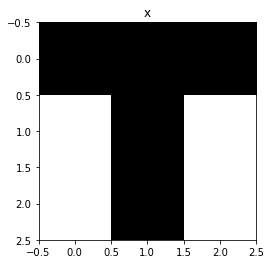

In [93]:
plt.imshow(1-x[0, 0].detach(), cmap='gray')
plt.title('x')
plt.savefig('cov2d_x.png')
plt.show()

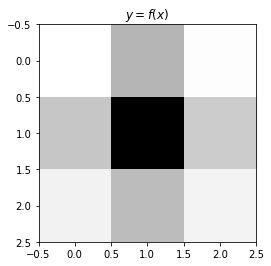

In [94]:
plt.imshow(1-y[0, 1].detach(), cmap='gray')
plt.title('$y=f(x)$')
plt.savefig('cov2d_y.png')
plt.show()

In [91]:
xhat = model.inverse(y)
xhat

tensor([[[[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [-8.9407e-08,  1.0000e+00, -3.5390e-08],
          [ 1.8626e-07,  1.0000e+00,  1.6391e-07]],

         [[ 7.4506e-08,  1.0000e+00,  2.9802e-08],
          [ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [ 7.4506e-09,  1.0000e+00,  1.4901e-08]]]])

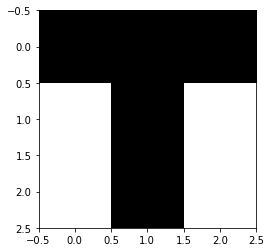

In [92]:
plt.imshow(1-xhat[0, 0].detach(), cmap='gray')
plt.savefig('cov2d_x_hat.png')
plt.show()